# Lab 4: Data Visualization and EDA

Objectives:
- To gain practice in creating various data visualizations
- To encourage students to perform EDA on the required dataset

***

1. Load all Superstore datasets.

*Note: The same dataset used in Lab 3*

In [47]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

dfOrder =  pd.read_csv("../week3/Superstore/superstore_order.csv")
dfPeople =  pd.read_csv("../week3/Superstore/superstore_people.csv")
dfReturn =  pd.read_csv("../week3/Superstore/superstore_return.csv")

2. Determine shape of each dataset (print out the results as well).

In [48]:
# Write your code here
print(dfOrder.shape)
print(dfPeople.shape)
print(dfReturn.shape)

(8880, 21)
(4, 2)
(296, 2)


3. Show information of the dataset.


In [49]:
# Write your code here (3.1)
print(dfOrder.info())
print(dfPeople.info())
print(dfReturn.info())
# dfOrder.isnull().any()
# dfPeople.isnull().any()
# dfReturn.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 18  Quantity

4. Are there any missing values? If so, in which column?

Ans: No missing values.

5. 
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [50]:
# Write your code here (5.1)
dfOrder["Segment"].unique()


array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [51]:
# 5.2
labels = dfOrder["Segment"].value_counts()
print(labels)


Segment
Consumer       4613
Corporate      2673
Home Office    1594
Name: count, dtype: int64


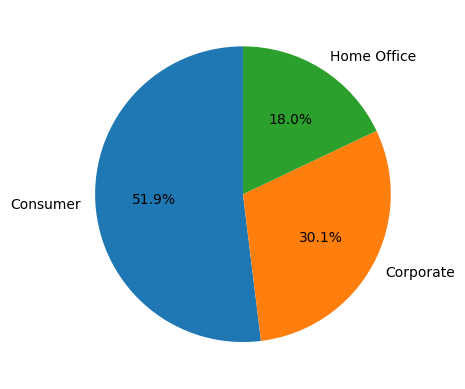

In [52]:
# 5.3
y = np.array(labels.values)
mylabels = labels.index

plt.pie(y, labels = mylabels, startangle=90, autopct='%1.1f%%') 
plt.show()

Answer for the question 5.4

Ans: Count all the possible data that in the column `Segment` from superstore_order and display the data in the piechart and show the percentage of each outcome into a percentage.

6. 
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [53]:
# Write your code here (6.1)
dfOrder["State"]



0         Kentucky
1         Kentucky
2       California
3          Florida
4          Florida
           ...    
8875         Texas
8876         Texas
8877    New Jersey
8878    New Jersey
8879    California
Name: State, Length: 8880, dtype: object

In [54]:
# 6.2
dataBar = dfOrder["State"].value_counts().head(10)
print(dataBar)

State
California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: count, dtype: int64


Text(0.5, 1.0, 'test')

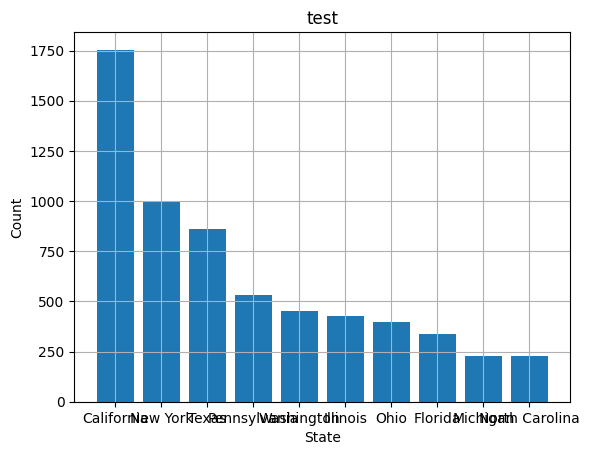

In [55]:
# 6.3

plt.bar(dataBar.index, dataBar.values)
plt.xlabel("State")
plt.ylabel("Count")
plt.grid()
plt.title("test")

In [56]:
#6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
dataBar = dfOrder["State"].value_counts().head(10)

total_sales = dfOrder.groupby("State")["Sales"].sum().loc[dataBar.index]

result_df = pd.DataFrame({"State Count": dataBar, "Total Sales": total_sales})

print(result_df)



                State Count  Total Sales
State                                   
California             1754  399195.4555
New York               1001  274866.8190
Texas                   860  147855.0282
Pennsylvania            531  103852.5210
Washington              452  124497.7780
Illinois                427   71456.1780
Ohio                    396   67924.2140
Florida                 339   84083.0880
Michigan                230   62147.6960
North Carolina          229   49962.1580


Answer for the question 6.5

Ans: The result from the previous section is to count all of the `State` from superstore orders and then sum all of the sales in each state

7. 
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [57]:
# Write your code here (7.1)
dfOrder["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

          category      count
0  Office Supplies  60.360360
1        Furniture  21.171171
2       Technology  18.468468


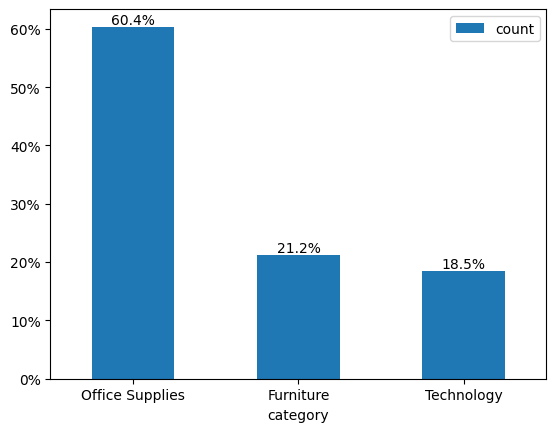

In [58]:
# 7.2
category = dfOrder["Category"].value_counts()

df = pd.DataFrame({"category":category.index, "count":category.values})
df['count'] = df['count'].apply(lambda x: (x/df['count'].sum())*100)
labels = df['count'].round(1).astype('str') + '%'

ax = df.plot.bar(x='category', y='count', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
print(df)

# plt.bar(category.labels, category.index, startangle=90, autopct='%1.1f%%') 
# plt.show()

8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [59]:
# write your code here
dfOrder["Order Date"] = pd.to_datetime(dfOrder["Order Date"], format="%d/%m/%Y")
dfOrder["Ship Date"] = pd.to_datetime(dfOrder["Ship Date"], format="%d/%m/%Y")

print(dfOrder["Order Date"].dtypes)
print(dfOrder["Ship Date"])

datetime64[ns]
0      2016-11-11
1      2016-11-11
2      2016-06-16
3      2015-10-18
4      2015-10-18
          ...    
8875   2016-08-19
8876   2016-08-19
8877   2017-09-23
8878   2017-09-23
8879   2015-03-25
Name: Ship Date, Length: 8880, dtype: datetime64[ns]


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [60]:
# write your code here
dfOrder["Processing time day"] = (dfOrder["Ship Date"] - dfOrder["Order Date"]).dt.days
print(dfOrder["Processing time day"])
print(dfOrder["Processing time day"].dtypes)


0       3
1       3
2       4
3       7
4       7
       ..
8875    6
8876    6
8877    6
8878    6
8879    2
Name: Processing time day, Length: 8880, dtype: int64
int64


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [61]:
# 10.1
dfOrder[dfOrder["Processing time day"] > 5].shape[0]

1656

In [62]:
# Write your code here (10.2)
dfOrder[dfOrder["Processing time day"] > 5].head(5)[["Order ID", "Order Date", "Ship Date", "Processing time day", "Quantity"]]


,Order ID,Order Date,Ship Date,Processing time day,Quantity
3,US-2015-108966,2015-10-11,2015-10-18,7,5
4,US-2015-108966,2015-10-11,2015-10-18,7,2
16,CA-2014-105893,2014-11-11,2014-11-18,7,6
53,CA-2016-105816,2016-12-11,2016-12-17,6,7
54,CA-2016-105816,2016-12-11,2016-12-17,6,5


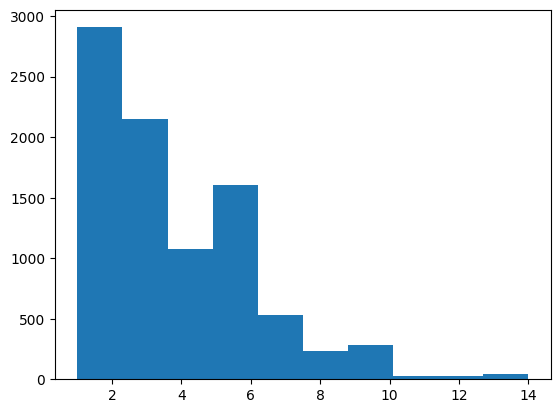

In [63]:
# 10.3
x = dfOrder["Quantity"]
plt.hist(x)
plt.show()

[BONUS 20 pts] Determine the percentage of customers who: 
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [77]:
merge = pd.merge(dfOrder, dfReturn, on='Order ID', how='left', indicator=True)["Customer ID"].nunique()

totalCustomer = merge

secondMerge = pd.merge(dfOrder, dfReturn, on='Order ID', how='inner')["Customer ID"]

joinCustomerB1 = len(secondMerge)

tempReturnB1 = (secondMerge.value_counts() == 1)

singleReturnB1 = len(tempReturnB1[tempReturnB1.values == True])


percentB1 = (singleReturnB1 / totalCustomer) * 100

percentB1


7.858048162230672

In [78]:
merge = pd.merge(dfOrder, dfReturn, on='Order ID', how='left', indicator=True)

joinCustomerB2 = merge[merge['_merge'] == 'both']['Customer ID']

tempReturnB2 = joinCustomerB2.nunique()

totalCustomer = merge["Customer ID"].nunique()

percentB2 = (tempReturnB2 / totalCustomer) * 100

percentB2

28.13688212927757

In [79]:
percentB3 = ((totalCustomer - tempReturnB2) / totalCustomer) * 100

percentB3

71.86311787072243

Text(0.5, 1.0, 'Percentage Of Csutomer')

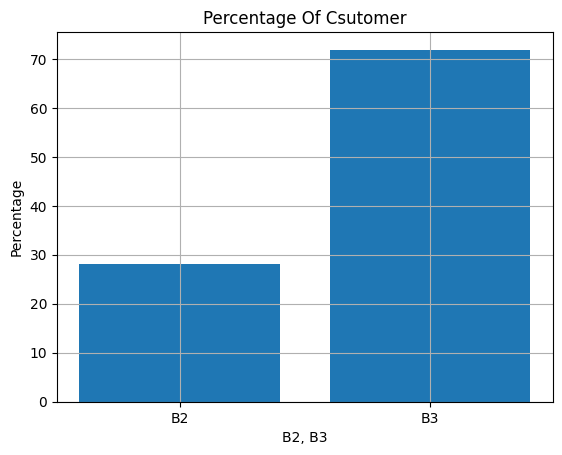

In [80]:
# 6.3

plt.bar(["B2", "B3"], [percentB2, percentB3])
plt.xlabel("B2, B3")
plt.ylabel("Percentage")
plt.grid()
plt.title("Percentage Of Csutomer")